<a href="https://colab.research.google.com/github/gaurav8901/Machine-Learning-/blob/main/Face_position_detection_using_ML_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
dataset = pd.read_csv("/content/drive/MyDrive/dataset_1.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fileName  606 non-null    object
 1   subject   606 non-null    int64 
 2   imgNum    606 non-null    int64 
 3   label     606 non-null    int64 
 4   ang       606 non-null    int64 
 5   xF        606 non-null    int64 
 6   yF        606 non-null    int64 
 7   wF        606 non-null    int64 
 8   hF        606 non-null    int64 
 9   xRE       606 non-null    int64 
 10  yRE       606 non-null    int64 
 11  xLE       606 non-null    int64 
 12  yLE       606 non-null    int64 
 13  xN        606 non-null    int64 
 14  yN        606 non-null    int64 
 15  xRM       606 non-null    int64 
 16  yRM       606 non-null    int64 
 17  xLM       606 non-null    int64 
 18  yLM       606 non-null    int64 
dtypes: int64(18), object(1)
memory usage: 90.1+ KB


In [6]:
dataset.shape

(606, 19)

In [7]:
print("No of classes in the dataset", dataset['label'].unique())
print("No of unique values in the angle colume", dataset['ang'].unique())

No of classes in the dataset [2 1 3]
No of unique values in the angle colume [  0 -15 -30 -45  15  30  45]


In [8]:
dataset.head(5)

,fileName,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,20130529_01_Driv_001_f,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,20130529_01_Driv_002_f,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,20130529_01_Driv_003_f,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,20130529_01_Driv_004_f,1,4,2,0,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,20130529_01_Driv_005_f,1,5,2,0,290,193,104,119,325,224,366,225,353,244,333,268,363,268


In [9]:
print("Unique angle class:", dataset['ang'].unique())
angle = dataset['ang']
angle = np.array(angle)
for i in range(0, angle.shape[0]):
  if(angle[i]==(-15)):
    angle[i] = 1
  if(angle[i]==(-30)):
    angle[i] = 2
  if(angle[i]==(-45)):
    angle[i] = 3
  if(angle[i]==(15)):
    angle[i] = 4
  if(angle[i]==(30)):
    angle[i] = 5
  if(angle[i]==(45)):
    angle[i] = 6

Unique angle class: [  0 -15 -30 -45  15  30  45]


In [10]:
angle

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 5, 6, 6, 5, 5, 4, 4, 4, 4,

In [11]:
# drop fileName	subject	imgNum	label	ang
dataset = dataset.drop(['fileName', 'subject', 'imgNum', 'ang'], axis = 1)

In [12]:
dataset.head(5)

,label,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,2,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,2,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,2,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,2,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,2,290,193,104,119,325,224,366,225,353,244,333,268,363,268


In [13]:
y = np.array(dataset['label'])
# drop the label colume
dataset = dataset.drop(['label'], axis = 1)
x = np.array(dataset)

In [14]:
# min max scaling the dataset
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [15]:
x.shape

(606, 14)

In [16]:
y.shape

(606,)

# 5 fold

In [17]:
# shuffel the dataset
x, y = shuffle(x, y, random_state=100)

In [18]:
import numpy as np
from sklearn.model_selection import KFold
def fold(features,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(features)
  print(kf)
  all_x_train = []
  all_x_test = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]
    all_x_train.append(X_train)
    all_x_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
  all_x_train, all_x_test, all_y_train, all_y_test  = np.array(all_x_train), np.array(all_x_test), np.array(all_y_train), np.array(all_y_test)
  return all_x_train, all_x_test, all_y_train, all_y_test

In [19]:
all_x_train, all_x_test, all_y_train, all_y_test = fold(x, y)

KFold(n_splits=5, random_state=1000, shuffle=True)


# Classification 

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(all_x_train[0], all_y_train[0], test_size=0.20, random_state=42)

## Logistic Regression




In [21]:
# hyperparameter tuning for logistic accuracy
def logistic_hyperparameter_tuning(epoch, alpha, roh, n_iter_no_change, X_train, X_validation, y_train, y_validation):
  val_acc = []
  train_acc = []
  for i in range(0, epoch.shape[0]):
    # we are taking logloss function for error calculation
    logistic_reg_classifier = OneVsRestClassifier(SGDClassifier(loss = 'log', alpha = alpha[i], fit_intercept = True, max_iter = epoch[i], tol = roh[i], n_iter_no_change = n_iter_no_change[i])).fit(X_train, y_train)
    predicted = logistic_reg_classifier.predict(X_validation)
    val_acc.append(accuracy_score(y_validation, predicted)*100)
    train_pred = logistic_reg_classifier.predict(X_train)
    train_acc.append(accuracy_score(y_train, train_pred)*100)
  # Get the maximum accuracy on validation
  print("Train Accuracy: ", train_acc)
  print("Validation Accuracy", val_acc)
  max_value = max(val_acc)
  max_index = val_acc.index(max_value)
  best_hyperparameter = (epoch[max_index], alpha[max_index], roh[max_index], n_iter_no_change[max_index])
  print("Best Hyperparameter:")
  print("Epoch = ", epoch[max_index])
  print("Alpha = ", alpha[max_index])
  print("Roh = ", roh[max_index])
  print("n_iter_no_change (Number of iterations with no improvement) = ", n_iter_no_change[max_index])
  return best_hyperparameter

In [22]:
epoch = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
alpha = np.array([0.01, 0.001, 0.0001, 0.00001, 0.125, 0.15, 0.18, 0.2, 0.25, 0.3])
roh = np.array([0.00001, 0.00001, 0.000001, 0.0000001, 0.000001, 0.0001, 0.0001, 0.0001, 0.0001, 0.000001])
n_iter_no_change = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 18])
epoch, alpha, roh, n_iter_no_change = logistic_hyperparameter_tuning(epoch, alpha, roh, n_iter_no_change, X_train, X_validation, y_train, y_validation)

Train Accuracy:  [90.95607235142118, 91.21447028423772, 92.24806201550388, 95.34883720930233, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118]
Validation Accuracy [89.69072164948454, 89.69072164948454, 93.81443298969072, 91.75257731958763, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454]
Best Hyperparameter:
Epoch =  200
Alpha =  0.0001
Roh =  1e-06
n_iter_no_change (Number of iterations with no improvement) =  10


In [23]:
# for testing delete this shell
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  logistic_regression = OneVsRestClassifier(SGDClassifier(loss = 'log', alpha = alpha, fit_intercept = True,\
                                                          max_iter = epoch, tol = roh, n_iter_no_change = n_iter_no_change,\
                                                          verbose= False))
  logistic_regression.fit(all_x_train[i], all_y_train[i])
  print("Accuracy on training data: " + str(logistic_regression.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = logistic_regression.predict(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print("Confusion Matrix : \n" + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 6-classes: ")
  # out_labels = [1, 2, 3, 4, 5, 6]
  print(classification_report(all_y_test[i], predicted, digits=4))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Accuracy on training data: 93.80165289256198%
Testing Accuracy Score: 89.34426229508196
Confusion Matrix : 
[[  2   5   0]
 [  1 106   0]
 [  0   7   1]]
Classification Report for 6-classes: 
              precision    recall  f1-score   support

           1     0.6667    0.2857    0.4000         7
           2     0.8983    0.9907    0.9422       107
           3     1.0000    0.1250    0.2222         8

    accuracy                         0.8934       122
   macro avg     0.8550    0.4671    0.5215       122
weighted avg     0.8917    0.8934    0.8639       122

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Accuracy on training data: 92.57731958762886%
Testing Accuracy Score: 95.86776859504133
Confus

In [24]:
logistic_regression = OneVsRestClassifier(SGDClassifier(loss = 'log', alpha = alpha, fit_intercept = True, max_iter = epoch, tol = roh, n_iter_no_change = n_iter_no_change))
logistic_regression.fit(X_train, y_train)
print("Accuracy on training data: " + str(logistic_regression.score(X_train, y_train)*100) + "%")
print("-"*100)
test_predicted = logistic_regression.predict(all_x_test[0])
print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[0], test_predicted)*100))
print("Testing Confusion Matrix : \n" + str(confusion_matrix(all_y_test[0], test_predicted)))
print("-"*100)
valid_predicted = logistic_regression.predict(X_validation)
print("Validation Accuracy Score: " + str(accuracy_score(y_validation, valid_predicted)*100))
print("Validation Confusion Matrix : \n" + str(confusion_matrix(y_validation, valid_predicted)))
print("-"*100)

Accuracy on training data: 95.09043927648578%
----------------------------------------------------------------------------------------------------
Testing Accuracy Score: 94.26229508196722
Testing Confusion Matrix : 
[[  1   6   0]
 [  0 107   0]
 [  0   1   7]]
----------------------------------------------------------------------------------------------------
Validation Accuracy Score: 93.81443298969072
Validation Confusion Matrix : 
[[ 2  6  0]
 [ 0 87  0]
 [ 0  0  2]]
----------------------------------------------------------------------------------------------------


# Single Layer Perceptron

In [25]:
# it's slp
class SingleLayerPerceptron():
    def predict(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        """
        z: 1D array of shape (no of patterns, )
        """
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        """
        y: 1D array of shape (no of patterns, )
        """
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        """
        y:      1D array of shape (no of patterns, )
        probs:  1D array of shape (no of patterns, )
        """
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        """
        y:      1D array of shape (no of patterns, )
        probs:  1D array of shape (no of patterns, )
        """
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        """
        y:      1D array of shape (no of patterns, )
        probs:  1D array of shape (no of patterns, )
        """
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, epoch, roh, lr):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        epoch:  int, convergence criteria (hyperparameter)
        roh:    float, convergence criteria (hyperparameter)
        lr:     float, learning rate (hyperparameter)
        """
        self.epoch = epoch
        self.roh = roh
        self.lr = lr 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y)
        return self
 
    def fit_data(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        itr = 0
        while (not self.epoch or itr < self.epoch):
            self.loss.append(self.mse(y, self.predict_(X)))
            # put the thershold function on the predicted value i.e. here self.predict_(X)
            temp = self.predict_(X)
            # threshold activation on the predicted value of all patterns
            for k in range(0, temp.shape[0]):
              for j in range(0, temp.shape[1]):
                if(temp[k][j]>=0.5):
                  temp[k][j] = 1
                else:
                  temp[k][j] = 0
            #print("Iteration: ", itr+1, " Mse: ", self.mse(y, self.predict_(X)))
            error = y - temp
            update = (self.lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh:
              print("Converged through roh criteria.")
              break
            itr +=1
        if(itr==self.epoch):
          print("Converged through maximum of Iteration:")

In [26]:
def slp_hyperparameter_tuning(epoch, alpha, roh, X_train, X_validation, y_train, y_validation):
  val_acc = []
  train_acc = []
  for i in range(0, epoch.shape[0]):
    # we are taking logloss function for error calculation
    slp_classifier = SingleLayerPerceptron().fit(X_train, y_train, epoch = epoch[i], roh = roh[i], lr = alpha[i])
    predicted = slp_classifier.predict_classes(X_validation)
    val_acc.append(accuracy_score(y_validation, predicted)*100)
    train_predicted = slp_classifier.predict_classes(X_train)
    train_acc.append(accuracy_score(y_train, train_predicted)*100)
  # Get the maximum accuracy on validation
  print("Training Accuracy: ", train_acc)
  print("Validation Accuracy: ", val_acc)
  max_value = max(val_acc)
  max_index = val_acc.index(max_value)
  best_hyperparameter = (epoch[max_index], alpha[max_index], roh[max_index])
  print("Best Hyperparameter:")
  print("Epoch = ", epoch[max_index])
  print("Alpha = ", alpha[max_index])
  print("Roh = ", roh[max_index])
  return best_hyperparameter

In [27]:
epoch = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
alpha = np.array([0.0001, 0.0001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.0001, 0.0001])
roh = np.array([0.00001, 0.00001, 0.000001, 0.0000001, 0.000001, 0.0001, 0.0001, 0.0001, 0.0001, 0.000001])
epoch, alpha, roh = slp_hyperparameter_tuning(epoch, alpha, roh, X_train, X_validation, y_train, y_validation)

Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Training Accuracy:  [90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 93.02325581395348, 92.76485788113695]
Validation Accuracy:  [89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 90.72164948453609, 91.75257731958763]
Best Hyperparameter:
Epoch =  550
Alpha =  0.0001
Roh =  1e-06


In [28]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  slp = SingleLayerPerceptron().fit(all_x_train[i], all_y_train[i], epoch = epoch, roh = roh, lr = alpha)
  print("Accuracy on training data: " + str(slp.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = slp.predict_classes(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  # out_labels = [1, 2, 3, 4, 5, 6]
  print(classification_report(all_y_test[i], predicted,  digits = 6))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Converged through maximum of Iteration:
Accuracy on training data: 92.14876033057851%
Testing Accuracy Score: 90.98360655737704
Confusion Matrix : 
[[  0   7   0]
 [  0 107   0]
 [  0   4   4]]
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000         7
           2   0.906780  1.000000  0.951111       107
           3   1.000000  0.500000  0.666667         8

    accuracy                       0.909836       122
   macro avg   0.635593  0.500000  0.539259       122
weighted avg   0.860864  0.909836  0.877887       122

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Converged through maximum of Iteration:
Accuracy on training data: 91.54639175257732%
Testin

In [29]:
# Overfit Detection
import numpy as np
import matplotlib.pyplot as plt
# it's slp
class Overfit_SingleLayerPerceptron():
    def predict(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        pre_vals = np.dot(X, self.weights.T).reshape(-1, len(np.unique(y)))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        """
        z: 1D array of shape (no of patterns, )
        """
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        """
        y: 1D array of shape (no of patterns, )
        """
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        """
        y: 1D array of shape (no of patterns, )
        probs: 1D array of shape (no of patterns, )
        """
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        """
        y: 1D array of shape (no of patterns, )
        probs: 1D array of shape (no of patterns, )
        """
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        """
        y: 1D array of shape (no of patterns, )
        probs: 1D array of shape (no of patterns, )
        """
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, X_validation, y_validation, epoch, roh, lr):
        """
        X: 2D array of shape (no of patterns in training set, no of features)
        y: 1D array of shape (no of patterns in training set, )
        X_validation: 2D array of shape (no of patterns in validation set, no of features)
        y_validation: 1D array of shape (no of patterns in validation set, )
        epoch:  int, convergence criteria (hyperparameter)
        roh:    float, convergence criteria (hyperparameter)
        lr:     float, learning rate (hyperparameter)
        """
        self.epoch = epoch
        self.roh = roh
        self.lr = lr 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        X_validation  = self.add_bias(X_validation)
        y = self.one_hot(y)
        y_valid = self.one_hot(y_validation)
        self.loss_train = []
        self.loss_valid = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y, X_validation, y_valid)
        return self
 
    def fit_data(self, X, y, X_validation, y_valid):
        """
        X: 2D array of shape (no of patterns in training set, no of features)
        y: 1D array of shape (no of patterns in training set, )
        X_validation: 2D array of shape (no of patterns in validation set, no of features)
        y_validation: 1D array of shape (no of patterns in validation set, )
        """
        itr = 0
        while (not self.epoch or itr < self.epoch):
            self.loss_train.append(self.mse(y, self.predict_(X)))
            self.loss_valid.append(self.mse(y_valid, self.predict_(X_validation)))
            # put the thershold function on the predicted value i.e. here self.predict_(X)
            temp = self.predict_(X)
            # threshold activation on the predicted value of all patterns
            for k in range(0, temp.shape[0]):
              for j in range(0, temp.shape[1]):
                if(temp[k][j]>=0.5):
                  temp[k][j] = 1
                else:
                  temp[k][j] = 0
            #print("Iteration: ", itr+1, " Mse: ", self.mse(y, self.predict_(X)))
            error = y - temp
            update = (self.lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh:
              print("Converged through roh criteria.")
              break
            itr +=1
        if(itr==self.epoch):
          print("Converged through maximum of Iteration:")

Converged through maximum of Iteration:
Accuracy on training data: 90.95607235142118%
----------------------------------------------------------------------------------------------------
Testing Accuracy Score: 87.70491803278688
Testing Confusion Matrix : 
[[  0   7   0]
 [  0 107   0]
 [  0   8   0]]
----------------------------------------------------------------------------------------------------
Validation Accuracy Score: 89.69072164948454
Validation Confusion Matrix : 
[[ 0  8  0]
 [ 0 87  0]
 [ 0  2  0]]
----------------------------------------------------------------------------------------------------


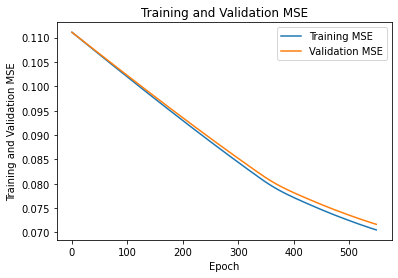

In [30]:
oslp = Overfit_SingleLayerPerceptron().fit(X_train, y_train, X_validation, y_validation, epoch, alpha, roh)
print("Accuracy on training data: " + str(oslp.score(X_train, y_train)*100) + "%")
print("-"*100)
test_predicted = oslp.predict_classes(all_x_test[0])
print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[0], test_predicted)*100))
print("Testing Confusion Matrix : \n" + str(confusion_matrix(all_y_test[0], test_predicted)))
print("-"*100)
valid_predicted = oslp.predict_classes(X_validation)
print("Validation Accuracy Score: " + str(accuracy_score(y_validation, valid_predicted)*100))
print("Validation Confusion Matrix : \n" + str(confusion_matrix(y_validation, valid_predicted)))
print("-"*100)
loss_train_mse = oslp.loss_train
loss_valid_mse = oslp.loss_valid
def plotting(x, y_1, y_2, label_1, label_2, t):
  plt.plot(x, y_1, label = label_1)
  plt.plot(x, y_2, label = label_2)
  plt.xlabel("Epoch")
  plt.ylabel("Training and Validation MSE")
  plt.legend()
  plt.title(t)
  plt.savefig("slp_overfit.pdf")
  plt.show()
x = []
for i in range(0, len(loss_valid_mse)):
  x.append(i)
plotting(x, loss_train_mse, loss_valid_mse, "Training MSE", "Validation MSE", "Training and Validation MSE")

# Sigmoid Neuron

In [31]:
# it's Sigmoid neuron
class SigmoidNeuron():
    def predict(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        """
        z: 1D array of shape (no of patterns, )
        """
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        """
        y: 1D array of shape (no of patterns, )
        """
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        """
        y:      1D array of shape (no of patterns, )
        probs:  1D array of shape (no of patterns, )
        """
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        """
        y:      1D array of shape (no of patterns, )
        probs:  1D array of shape (no of patterns, )
        """
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        """
        y:      1D array of shape (no of patterns, )
        probs:  1D array of shape (no of patterns, )
        """
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, epoch, roh, lr):
        """
        X: 2D array of shape (no of patterns in training set, no of features)
        y: 1D array of shape (no of patterns in training set, )
        epoch:  int, convergence criteria (hyperparameter)
        roh:    float, convergence criteria (hyperparameter)
        lr:     float, learning rate (hyperparameter)
        """
        self.epoch = epoch
        self.roh = roh
        self.lr = lr 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y)
        return self
 
    def fit_data(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        itr = 0
        while (not self.epoch or itr < self.epoch):
            self.loss.append(self.mse(y, self.predict_(X)))
            # put the thershold function on the predicted value i.e. here self.predict_(X)
            temp = self.predict_(X)
            #print("Iteration: ", itr+1, " Mse: ", self.mse(y, self.predict_(X)))
            error = y - temp
            update = (self.lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh:
              print("Converged through roh criteria.")
              break
            itr +=1
        if(itr==self.epoch):
          print("Converged through maximum of Iteration:")

In [32]:
# hyperparameter tuning
def sn_hyperparameter_tuning(epoch, alpha, roh, X_train, X_validation, y_train, y_validation):
  val_acc = []
  train_acc = []
  for i in range(0, epoch.shape[0]):
    # we are taking logloss function for error calculation
    sn_classifier = SigmoidNeuron().fit(X_train, y_train, epoch = epoch[i], roh = roh[i], lr = alpha[i])
    predicted = sn_classifier.predict_classes(X_validation)
    val_acc.append(accuracy_score(y_validation, predicted)*100)
    train_predicted = sn_classifier.predict_classes(X_train)
    train_acc.append(accuracy_score(y_train, train_predicted)*100)
  # Get the maximum accuracy on validation
  print("Training Accuracy: ", train_acc)
  print("Validation Accuracy: ", val_acc)
  # Get the maximum accuracy on validation
  max_value = max(val_acc)
  max_index = val_acc.index(max_value)
  best_hyperparameter = (epoch[max_index], alpha[max_index], roh[max_index])
  print("Best Hyperparameter:")
  print("Epoch = ", epoch[max_index])
  print("Alpha = ", alpha[max_index])
  print("Roh = ", roh[max_index])
  return best_hyperparameter

In [33]:
epoch = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
alpha = np.array([0.0001, 0.0001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.00001, 0.0001, 0.0001])
roh = np.array([0.00001, 0.00001, 0.000001, 0.0000001, 0.000001, 0.0001, 0.0001, 0.0001, 0.0001, 0.000001])
epoch, alpha, roh = sn_hyperparameter_tuning(epoch, alpha, roh, X_train, X_validation, y_train, y_validation)

Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Converged through maximum of Iteration:
Training Accuracy:  [90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118, 90.95607235142118]
Validation Accuracy:  [89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454, 89.69072164948454]
Best Hyperparameter:
Epoch =  100
Alpha =  0.0001
Roh =  1e-05


In [34]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  sn = SigmoidNeuron().fit(all_x_train[i], all_y_train[i], epoch = epoch, roh = roh, lr = alpha)
  print("Accuracy on training data: " + str(sn.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = sn.predict_classes(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)))
  print(classification_report(all_y_test[i], predicted))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Converged through maximum of Iteration:
Accuracy on training data: 90.70247933884298%
Testing Accuracy Score: 87.70491803278688
Confusion Matrix : 
[[  0   7   0]
 [  0 107   0]
 [  0   8   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.88      1.00      0.93       107
           3       0.00      0.00      0.00         8

    accuracy                           0.88       122
   macro avg       0.29      0.33      0.31       122
weighted avg       0.77      0.88      0.82       122

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Converged through maximum of Iteration:
Accuracy on training data: 89.48453608247424%
Testin

In [35]:
# Overfit Detection
import numpy as np
import matplotlib.pyplot as plt
# it's slp
class Overfit_SigmoidNeuron():
    def predict(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        pre_vals = np.dot(X, self.weights.T).reshape(-1, len(np.unique(y)))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        """
        z: 1D array of shape (no of patterns, )
        """
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self, X):
        """
        X: 2D array of shape (no of patterns, no of features)
        """
        return np.insert(X, 0, 1, axis=1)

    def one_hot(self, y):
        """
        y: 1D array of shape (no of patterns, )
        """
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        """
        X: 2D array of shape (no of patterns, no of features)
        y: 1D array of shape (no of patterns, )
        """
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))

    def logloss(self, y, probs):
        """
        y: 1D array of shape (no of patterns, )
        probs: 1D array of shape (no of patterns, )
        """
        return np.mean(-y*np.log(probs) - (1-y)*np.log(1-probs))

    def cross_entropy(self, y, probs):
        """
        y: 1D array of shape (no of patterns, )
        probs: 1D array of shape (no of patterns, )
        """
        return -1 * np.mean(y * np.log(probs))

    def mse(self, y, probs):
        """
        y: 1D array of shape (no of patterns, )
        probs: 1D array of shape (no of patterns, )
        """
        return (((y - probs)**2).mean())/2
        
    def fit(self, X, y, X_validation, y_validation, epoch, roh, lr):
        """
        X: 2D array of shape (no of patterns in training set, no of features)
        y: 1D array of shape (no of patterns in training set, )
        X_validation: 2D array of shape (no of patterns in validation set, no of features)
        y_validation: 1D array of shape (no of patterns in validation set, )
        epoch:  int, convergence criteria (hyperparameter)
        roh:    float, convergence criteria (hyperparameter)
        lr:     float, learning rate (hyperparameter)
        """
        self.epoch = epoch
        self.roh = roh
        self.lr = lr 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        X_validation  = self.add_bias(X_validation)
        y = self.one_hot(y)
        y_valid = self.one_hot(y_validation)
        self.loss_train = []
        self.loss_valid = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))*0.1
        self.fit_data(X, y, X_validation, y_valid)
        return self
 
    def fit_data(self, X, y, X_validation, y_valid):
        """
        X: 2D array of shape (no of patterns in training set, no of features)
        y: 1D array of shape (no of patterns in training set, )
        X_validation: 2D array of shape (no of patterns in validation set, no of features)
        y_validation: 1D array of shape (no of patterns in validation set, )
        """
        itr = 0
        while (not self.epoch or itr < self.epoch):
            self.loss_train.append(self.mse(y, self.predict_(X)))
            self.loss_valid.append(self.mse(y_valid, self.predict_(X_validation)))
            # put the thershold function on the predicted value i.e. here self.predict_(X)
            temp = self.predict_(X)
            #print("Iteration: ", itr+1, " Mse: ", self.mse(y, self.predict_(X)))
            error = y - temp
            update = (self.lr * np.dot(error.T, X))
            self.weights += update
            if np.abs(update).max() < self.roh:
              print("Converged through roh criteria.")
              break
            itr +=1
        if(itr==self.epoch):
          print("Converged through maximum of Iteration:")

In [36]:
osn = Overfit_SigmoidNeuron().fit(X_train, y_train, X_validation, y_validation, epoch, alpha, roh)
print("Accuracy on training data: " + str(osn.score(X_train, y_train)*100) + "%")
print("-"*100)
test_predicted = osn.predict_classes(all_x_test[0])
print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[0], test_predicted)*100))
print("Testing Confusion Matrix : \n" + str(confusion_matrix(all_y_test[0], test_predicted)))
print("-"*100)
valid_predicted = osn.predict_classes(X_validation)
print("Validation Accuracy Score: " + str(accuracy_score(y_validation, valid_predicted)*100))
print("Validation Confusion Matrix : \n" + str(confusion_matrix(y_validation, valid_predicted)))
print("-"*100)

Converged through maximum of Iteration:
Accuracy on training data: 90.95607235142118%
----------------------------------------------------------------------------------------------------
Testing Accuracy Score: 87.70491803278688
Testing Confusion Matrix : 
[[  0   7   0]
 [  0 107   0]
 [  0   8   0]]
----------------------------------------------------------------------------------------------------
Validation Accuracy Score: 89.69072164948454
Validation Confusion Matrix : 
[[ 0  8  0]
 [ 0 87  0]
 [ 0  2  0]]
----------------------------------------------------------------------------------------------------


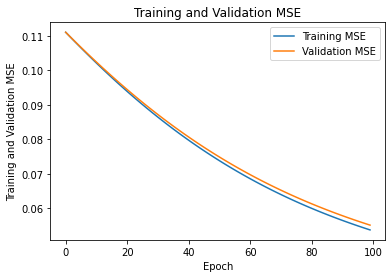

In [37]:
loss_train_mse = osn.loss_train
loss_valid_mse = osn.loss_valid
def plotting(x, y_1, y_2, label_1, label_2, t):
  plt.plot(x, y_1, label = label_1)
  plt.plot(x, y_2, label = label_2)
  plt.xlabel("Epoch")
  plt.ylabel("Training and Validation MSE")
  plt.legend()
  plt.title(t)
  plt.savefig("sn_overfit.pdf")
  plt.show()
x = []
for i in range(0, len(loss_valid_mse)):
  x.append(i)
plotting(x, loss_train_mse, loss_valid_mse, "Training MSE", "Validation MSE", "Training and Validation MSE")

# MLP (with one hidden layer)

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
# hyperparameter tuning for logistic accuracy
def mlp_hyperparameter_tuning(no_of_hidden_neurons, epoch, alpha, roh, n_iter_no_change, X_train, X_validation, y_train, y_validation):
  val_acc = []
  for i in range(0, epoch.shape[0]):
    mlp_classifier = MLPClassifier(hidden_layer_sizes = (no_of_hidden_neurons[i],), activation = 'logistic', solver = 'sgd', learning_rate = 'constant',\
      learning_rate_init = alpha[i], max_iter = epoch[i], shuffle = True, random_state = 100, tol = roh[i],\
      verbose = False, early_stopping = True, n_iter_no_change = n_iter_no_change[i]).fit(X_train, y_train)
    # we are taking logloss function for error calculation
    predicted = mlp_classifier.predict(X_validation)
    val_acc.append(accuracy_score(y_validation, predicted)*100)
  # Get the maximum accuracy on validation
  max_value = max(val_acc)
  max_index = val_acc.index(max_value)
  best_hyperparameter = (no_of_hidden_neurons[max_index], epoch[max_index], alpha[max_index], roh[max_index], n_iter_no_change[max_index])
  print("Best Hyperparameter:")
  print("No of neurons in the 1st hidden layer = ", no_of_hidden_neurons[max_index])
  print("Epoch = ", epoch[max_index])
  print("Alpha = ", alpha[max_index])
  print("Roh = ", roh[max_index])
  print("n_iter_no_change (Number of iterations with no improvement) = ", n_iter_no_change[max_index])
  return best_hyperparameter

In [40]:
no_of_hidden_neurons = np.array([561, 581, 591, 600, 620, 650, 670, 700, 730, 750])
epoch = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
alpha = np.array([0.01, 0.001, 0.0001, 0.00001, 0.125, 0.15, 0.18, 0.2, 0.25, 0.3])
roh = np.array([0.00001, 0.00001, 0.000001, 0.0000001, 0.000001, 0.0001, 0.0001, 0.0001, 0.0001, 0.000001])
n_iter_no_change = np.array([8, 9, 10, 11, 12, 13, 14, 15, 16, 18])
no_of_hidden_neurons, epoch, alpha, roh, n_iter_no_change = mlp_hyperparameter_tuning(no_of_hidden_neurons, epoch, alpha, roh, n_iter_no_change, X_train, X_validation, y_train, y_validation)

Best Hyperparameter:
No of neurons in the 1st hidden layer =  561
Epoch =  100
Alpha =  0.01
Roh =  1e-05
n_iter_no_change (Number of iterations with no improvement) =  8


In [41]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("-"*100)
  mlp_classifier = MLPClassifier(hidden_layer_sizes = (no_of_hidden_neurons,), activation = 'logistic',\
                                 solver = 'sgd', learning_rate = 'constant', learning_rate_init = alpha,\
                                 max_iter = epoch, shuffle = True, random_state = 100, tol = roh,\
                            verbose = False, early_stopping = True, n_iter_no_change = n_iter_no_change)
  mlp_classifier.fit(all_x_train[i], all_y_train[i])
  print("Accuracy on training data: " + str(mlp_classifier.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = mlp_classifier.predict(all_x_test[i])
  print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[i], predicted)*100))
  print("Confusion Matrix : \n" + str(confusion_matrix(all_y_test[i], predicted)))
  print("Classification Report for 6-classes: ")
  # out_labels = [1, 2, 3, 4, 5, 6]
  print(classification_report(all_y_test[i], predicted,  digits=4))
  print("-"*100)

For fold no: 1
----------------------------------------------------------------------------------------------------
Accuracy on training data: 90.70247933884298%
Testing Accuracy Score: 87.70491803278688
Confusion Matrix : 
[[  0   7   0]
 [  0 107   0]
 [  0   8   0]]
Classification Report for 6-classes: 
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000         7
           2     0.8770    1.0000    0.9345       107
           3     0.0000    0.0000    0.0000         8

    accuracy                         0.8770       122
   macro avg     0.2923    0.3333    0.3115       122
weighted avg     0.7692    0.8770    0.8196       122

----------------------------------------------------------------------------------------------------
For fold no: 2
----------------------------------------------------------------------------------------------------
Accuracy on training data: 89.48453608247424%
Testing Accuracy Score: 92.56198347107438
Confus

In [42]:
# Is there any overfit issue?
mlp_classifier = MLPClassifier(hidden_layer_sizes = (no_of_hidden_neurons,), activation = 'logistic',\
                                solver = 'sgd', learning_rate = 'constant', learning_rate_init = alpha,\
                                max_iter = epoch, shuffle = True, random_state = 100, tol = roh,\
                                verbose = False, early_stopping = True, n_iter_no_change = n_iter_no_change)
mlp_classifier.fit(X_train, y_train)
print("Accuracy on training data: " + str(mlp_classifier.score(X_train, y_train)*100) + "%")
print("-"*100)
test_predicted = mlp_classifier.predict(all_x_test[0])
print("Testing Accuracy Score: " + str(accuracy_score(all_y_test[0], test_predicted)*100))
print("Testing Confusion Matrix : \n" + str(confusion_matrix(all_y_test[0], test_predicted)))
print("-"*100)
valid_predicted = mlp_classifier.predict(X_validation)
print("Validation Accuracy Score: " + str(accuracy_score(y_validation, valid_predicted)*100))
print("Validation Confusion Matrix : \n" + str(confusion_matrix(y_validation, valid_predicted)))
print("-"*100)

Accuracy on training data: 90.95607235142118%
----------------------------------------------------------------------------------------------------
Testing Accuracy Score: 87.70491803278688
Testing Confusion Matrix : 
[[  0   7   0]
 [  0 107   0]
 [  0   8   0]]
----------------------------------------------------------------------------------------------------
Validation Accuracy Score: 89.69072164948454
Validation Confusion Matrix : 
[[ 0  8  0]
 [ 0 87  0]
 [ 0  2  0]]
----------------------------------------------------------------------------------------------------
